# Introduction

Houses prices is a small standard Regression problem, the data set was token from a kaggle competition, formatted in the AutoML format.

In [1]:
model_dir = 'sample_code_submission/'          
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
mycode_dir = 'mycode/'
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir);  path.append(mycode_dir); 
import seaborn as sns; sns.set()
from visualisation import visualisation as vs

# Step 1: Exploratory data analysis

We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.


In [2]:
datadir = 'public_data/'             
basename = 'houseprice'
##!ls $datadir*

In [3]:
# We read data as Panda data frames
feat_name = pd.read_csv(datadir+basename + '_feat.name', header=None)
label_name = pd.read_csv(datadir+basename + '_label.name', header=None)


X = pd.read_csv(datadir+basename + '_train.data', sep=' ', names = np.ravel(feat_name))
Y = pd.read_csv(datadir+ basename + '_train.solution', sep=' ', names = np.ravel(label_name))



X_valid = pd.read_csv(datadir+basename + '_valid.data', sep=' ', names = np.ravel(feat_name))
Y_valid = pd.read_csv(datadir+ basename + '_valid.solution', sep=' ', names = np.ravel(label_name))
X_test = pd.read_csv(datadir+basename + '_test.data', sep=' ', names = np.ravel(feat_name))
Y_test = pd.read_csv(datadir+ basename + '_test.solution', sep=' ', names = np.ravel(label_name))



##X['waterfront'] = X['waterfront'].astype('category',ordered=True)
##X['view'] = X['view'].astype('category',ordered=True)
##X['condition'] = X['condition'].astype('category',ordered=True)
##X['grade'] = X['grade'].astype('category',ordered=False)


X_valid['waterfront'] = X_valid['waterfront'].astype('category',ordered=True)
X_valid['view'] = X_valid['view'].astype('category',ordered=True)
X_valid['condition'] = X_valid['condition'].astype('category',ordered=True)
X_valid['grade'] = X_valid['grade'].astype('category',ordered=False)


X_test['waterfront'] = X_test['waterfront'].astype('category',ordered=True)
X_test['view'] = X_test['view'].astype('category',ordered=True)
X_test['condition'] = X_test['condition'].astype('category',ordered=True)
X_test['grade'] = X_test['grade'].astype('category',ordered=False)

[patnum, featnum] = X.shape
[patnum2, classnum] = Y.shape
assert(patnum==patnum2)
print 'Number of examples = %d' % patnum
print 'Number of features = %d' % featnum
print 'Number of variables to predict = %d' % classnum

Number of examples = 12967
Number of features = 18
Number of variables to predict = 1


In [4]:
X.describe()

,sqft_living15,bathrooms,condition,sqft_basement,sqft_lot15,long,yr_renovated,grade,sqft_living,sqft_above,waterfront,view,floors,sqft_lot,bedrooms,zipcode,lat,yr_built
count,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,1.296700e+04,12967.000000,12967.000000,12967.0,12967.000000
mean,1748.221177,1.700933,3.447289,302.674404,13276.086065,-121.934526,89.894347,7.593969,2050.895581,1974.819696,0.007403,0.236909,1.381430,1.577829e+04,3.361996,98077.842600,47.0,1967.422457
std,807.951361,0.724200,0.667537,450.478681,27260.086285,0.247370,413.970493,1.161336,908.934984,673.559639,0.085727,0.766621,0.520255,4.282275e+04,0.910324,53.935206,0.0,27.884628
min,380.000000,0.000000,1.000000,0.000000,660.000000,-122.000000,0.000000,3.000000,380.000000,460.000000,0.000000,0.000000,1.000000,5.720000e+02,0.000000,98001.000000,47.0,1900.000000
25%,1180.000000,1.000000,3.000000,0.000000,5444.500000,-122.000000,0.000000,7.000000,1410.000000,1490.000000,0.000000,0.000000,1.000000,5.444500e+03,3.000000,98033.000000,47.0,1950.000000
50%,1530.000000,2.000000,3.000000,0.000000,7828.000000,-122.000000,0.000000,7.000000,1890.000000,1830.000000,0.000000,0.000000,1.000000,7.900000e+03,3.000000,98065.000000,47.0,1969.000000
75%,2130.000000,2.000000,4.000000,600.000000,10310.000000,-122.000000,0.000000,8.000000,2500.000000,2340.000000,0.000000,0.000000,2.000000,1.105400e+04,4.000000,98118.000000,47.0,1990.000000
max,9410.000000,8.000000,5.000000,4820.000000,871200.000000,-121.000000,2015.000000,13.000000,13540.000000,6110.000000,1.000000,4.000000,3.000000,1.651359e+06,11.000000,98199.000000,47.0,2015.000000


In [5]:
Y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [6]:
# Here we add the target values as a last column, this is convenient to use seaborn
numerical_target = Y['price'] 

XY = X.assign(price=numerical_target.values) 


Let's first display the distribution of the target column (price) using a boxplot.

In [ ]:
var = 'bedrooms'
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y='price', data=XY)
fig.axis(ymin=0, ymax=1500000);


we can also use a histogram for our target variable

In [ ]:
var = 'grade'
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x=var, y='price', data=XY)
fig.axis(ymin=0, ymax=1750000)

In [ ]:
var = 'bathrooms'
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=XY)
fig.axis(ymin=0, ymax=3500000);

In [ ]:
plt.hist(XY.price, bins = 25)

Immediately, we notice that the distribution is skewed towards cheaper homes. To make the distribution more symmetric, we can use its logarithm:

In [ ]:
plt.hist(np.log(XY.price), bins = 25)

In [ ]:
sns.stripplot(x='bedrooms', y='price',data=XY)

The graph indicates that the relation of price with bedrooms. Price goes up with number of bedrooms upto 6 and then comes down as no of bedrooms increase.

In [ ]:
sns.stripplot(x='grade', y='price',data=XY, size=5)


Price of the house is dependent on grade of the house, higher the grade higher the price.

In [ ]:
df=XY
df['age_of_renov'] = 100
df.loc[df['yr_renovated'] != 0,'age_of_renov'] = 2015-df.loc[df['yr_renovated'] != 0,'yr_renovated']

sns.regplot(x='age_of_renov',y='price',data=XY)

the relation between the price and age of renovation

In [ ]:
sns.regplot(x='sqft_living',y='price',data=XY)

In [ ]:
sns.regplot(x='sqft_basement',y='price',data=XY)

In [ ]:
sns.regplot(x='sqft_above',y='price',data=XY)


In [ ]:
sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bedrooms','bathrooms']
sns.pairplot(XY[cols], size = 2.5,  palette='afmhot')
plt.show();

In [7]:
visu = vs()

In [8]:
XY.describe()

,sqft_living15,bathrooms,condition,sqft_basement,sqft_lot15,long,yr_renovated,grade,sqft_living,sqft_above,waterfront,view,floors,sqft_lot,bedrooms,zipcode,lat,yr_built,price
count,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,1.296700e+04,12967.000000,12967.000000,12967.0,12967.000000,1.296700e+04
mean,1748.221177,1.700933,3.447289,302.674404,13276.086065,-121.934526,89.894347,7.593969,2050.895581,1974.819696,0.007403,0.236909,1.381430,1.577829e+04,3.361996,98077.842600,47.0,1967.422457,5.316054e+05
std,807.951361,0.724200,0.667537,450.478681,27260.086285,0.247370,413.970493,1.161336,908.934984,673.559639,0.085727,0.766621,0.520255,4.282275e+04,0.910324,53.935206,0.0,27.884628,3.690935e+05
min,380.000000,0.000000,1.000000,0.000000,660.000000,-122.000000,0.000000,3.000000,380.000000,460.000000,0.000000,0.000000,1.000000,5.720000e+02,0.000000,98001.000000,47.0,1900.000000,7.500000e+04
25%,1180.000000,1.000000,3.000000,0.000000,5444.500000,-122.000000,0.000000,7.000000,1410.000000,1490.000000,0.000000,0.000000,1.000000,5.444500e+03,3.000000,98033.000000,47.0,1950.000000,3.150000e+05
50%,1530.000000,2.000000,3.000000,0.000000,7828.000000,-122.000000,0.000000,7.000000,1890.000000,1830.000000,0.000000,0.000000,1.000000,7.900000e+03,3.000000,98065.000000,47.0,1969.000000,4.450000e+05
75%,2130.000000,2.000000,4.000000,600.000000,10310.000000,-122.000000,0.000000,8.000000,2500.000000,2340.000000,0.000000,0.000000,2.000000,1.105400e+04,4.000000,98118.000000,47.0,1990.000000,6.350000e+05
max,9410.000000,8.000000,5.000000,4820.000000,871200.000000,-121.000000,2015.000000,13.000000,13540.000000,6110.000000,1.000000,4.000000,3.000000,1.651359e+06,11.000000,98199.000000,47.0,2015.000000,7.700000e+06


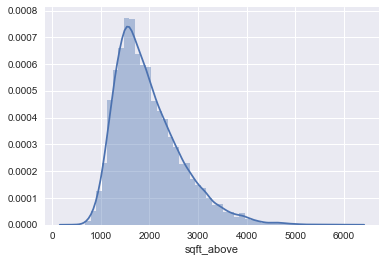

In [9]:
visu.histogramme_val(XY, "sqft_above")

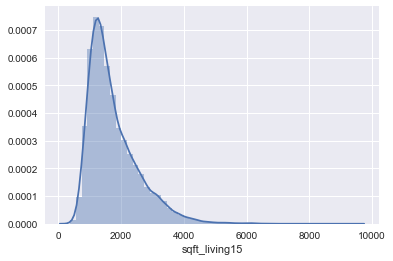

In [10]:
visu.histogramme_val(XY, "sqft_living15")

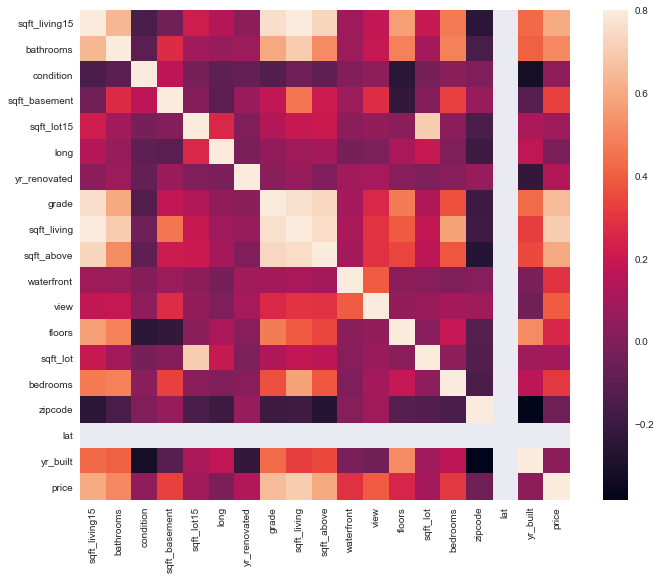

In [12]:
visu.correlation(XY)

# Building predictive models
The initial classifier in your sandbox.



In [ ]:
X = X.values
y=numerical_target 

X_test = X_test.values
y_test=Y_test['price']

X_valid = X_valid.values
y_valid=Y_valid['price']

from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeRegressor

class Classifier(BaseEstimator):
    def __init__(self):
        self.clf = linear_model.LinearRegression()

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)

In [ ]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold # import KFold
from numpy import zeros, mean

kf = KFold(n_splits=3,random_state=1) # Define the split - into 2 folds 
i=0
scores = zeros(3)

    
for idx_t, idx_v in kf.split(X):
    Xtr = X[idx_t]
    Ytr = y[idx_t]
   
    Xva = X[idx_v]
    Yva = y[idx_v]
    clf = Classifier()
    clf.fit(Xtr, Ytr)
    Y_predict = clf.predict(Xva)
    scores[i] =r2_score(Yva,Y_predict )
    print 'Fold', i+1, 'R2 score metric = ', scores[i]
    i=i+1
print 'Average score = ', mean(scores)

In [ ]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

# This will perform 2-fold cross-validation
# for 0.18 version or newer, use:
from sklearn.model_selection import cross_val_score

# for pre-0.18 versions of scikit, use:
from sklearn.cross_validation import cross_val_score


scores = cross_val_score(linear_model.LinearRegression(), X, y, cv=3)
print scores

In [ ]:
outdir = 'sample_result_submission'

In [ ]:
from model import model

In [ ]:
M = model()
trained_model_name = model_dir + basename
M = M.load(trained_model_name)

In [ ]:
if not(M.is_trained):
    X_train = X
    Y_train = numerical_target
    M.fit(X_train, Y_train)  
Y_hat_train = M.predict(X) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(X_valid)
Y_hat_test = M.predict(X_test)




Save the trained model (will be ready to reload next time around) and save the prediction results:

In [ ]:
M.save(trained_model_name)                 
result_name = 'sample_result_submission/' + basename
#import os
#os.write(result_name + '_valid.predict', Y_hat_valid)
#os.write(result_name + '_test.predict', Y_hat_test)
#!ls $result_name*

# Step 3: Making a submission

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 

In [ ]:
outdir = 'sample_result_submission'

In [ ]:
!python $problem_dir/ingestion.py $datadir $outdir $problem_dir $model_dir

# Making submission

In [ ]:
outdir = 'sample_result_submission'
!python2 $problem_dir/ingestion.py $datadir $outdir $problem_dir $model_dir